# Start

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import contractions
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords, wordnet
import pandas as pd
import numpy as np
import nltk
import pickle
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")


In [288]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [152]:
train_df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [154]:
train_df.describe(include=['O'])


,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


In [173]:
set(train_df['keyword'])

{'ablaze',
 'accident',
 'aftershock',
 'airplane%20accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew%20up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown%20up',
 'body%20bag',
 'body%20bagging',
 'body%20bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge%20collapse',
 'buildings%20burning',
 'buildings%20on%20fire',
 'burned',
 'burning',
 'burning%20buildings',
 'bush%20fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical%20emergency',
 'cliff%20fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate',
 'de

In [287]:
train_df['keyword'] = train_df['keyword'].str.replace("%20", " ")
test_df['keyword'] = test_df['keyword'].str.replace("%20", " ")

KeyError: 'keyword'

In [157]:
set(train_df['keyword'])

{'ablaze',
 'accident',
 'aftershock',
 'airplane accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown up',
 'body bag',
 'body bagging',
 'body bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge collapse',
 'buildings burning',
 'buildings on fire',
 'burned',
 'burning',
 'burning buildings',
 'bush fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical emergency',
 'cliff fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate',
 'desolation',
 'destroy',
 'des

In [158]:
train_df.isna().sum().reset_index()

,index,0
0,id,0
1,keyword,61
2,location,2533
3,text,0
4,target,0


In [159]:
set(train_df["location"])

{nan,
 'The Epicenter, and Beyond',
 'Miami,Fla',
 '#LemonGang ',
 'Mooseknuckle, Maine',
 'Voorhees, NJ',
 'The Citadel, Oldtown, Westeros',
 'Ktx',
 'Sylacauga, Alabama',
 'On the toilet having a dump ',
 'Gwersyllt, Wales',
 'France',
 'Hyderabad Telangana INDIA',
 'Itirapina, SÌ£o Paulo',
 'Hilton Head, SC  ',
 'Milton/Tallahassee',
 'Mid north coast of NSW',
 'Hogsmeade',
 '| CA \x89Û¢ GA  |',
 'Vidalia GA',
 'Winston Salem, North Carolina',
 'Los Angeles, CA',
 'Sheffield/Leeds',
 'Narnia',
 'Pontefract UK',
 'lagos nigeria',
 ' snapchat // fvck_casper ',
 'Den Helder, Rijkswerf',
 'Portoviejo-Manabi-Ecuador',
 'Cypress, CA 90630',
 'Anna Maria, FL',
 'Seattle native in Prescott, AZ',
 'Des Moines, IA',
 'Whiterun, Skyrim',
 'Tafekop Ga-Matsepe',
 'hkXfYMhEx',
 'Atlanta, Georgia',
 'Lincoln City Oregon',
 '956',
 'LA ??',
 'Slatina,Romania',
 'Fredericksburg, Virginia',
 'Canada BC',
 'The North',
 'i love you zayn',
 'Freddy Fazbears pizzeria',
 'The Weird Part of Wonderland',
 

In [175]:
train_df.drop('location', axis=1, inplace=True)

In [176]:
train_df.drop('keyword', axis=1, inplace=True)

In [177]:
train_df.drop('id', axis=1, inplace=True)

In [178]:
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


# Text

In [179]:
df = train_df

In [180]:
df['text_len'] = df['text'].apply(lambda x: len(x))

In [181]:
df.head()

,text,target,text_len
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


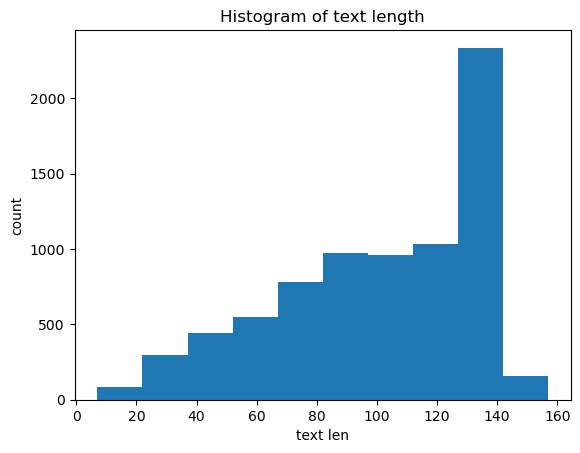

In [183]:
plt.title("Histogram of text length")
plt.xlabel("text len")
plt.ylabel("count")
plt.hist(df["text_len"])
plt.show()

In [184]:
df['text_words'] = df['text'].apply(lambda x: len(x.split()))

In [190]:
df.head()

,text,target,text_len,text_words,hash_count
0,Our Deeds are the Reason of this #earthquake M...,1,69,13,1
1,Forest fire near La Ronge Sask. Canada,1,38,7,0
2,All residents asked to 'shelter in place' are ...,1,133,22,0
3,"13,000 people receive #wildfires evacuation or...",1,65,8,1
4,Just got sent this photo from Ruby #Alaska as ...,1,88,16,2


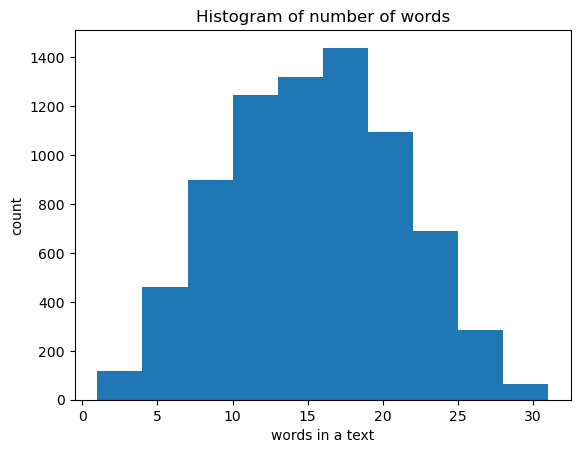

In [186]:
plt.title("Histogram of number of words")
plt.xlabel("words in a text")
plt.ylabel("count")
plt.hist(df["text_words"])
plt.show()

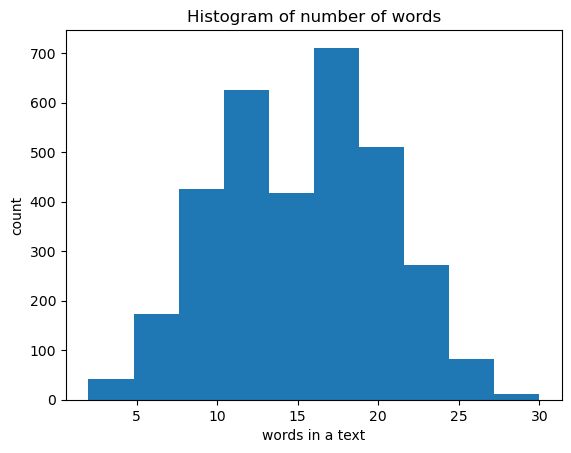

In [51]:
plt.title("Histogram of number of words")
plt.xlabel("words in a text")
plt.ylabel("count")
plt.hist(df.loc[df['target'] == 1]["text_words"])
plt.show()

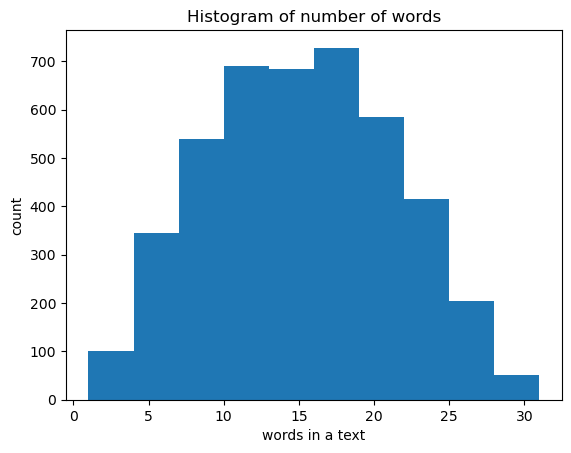

In [187]:
plt.title("Histogram of number of words")
plt.xlabel("words in a text")
plt.ylabel("count")
plt.hist(df.loc[df['target'] == 0]["text_words"])
plt.show()

Comparing number of words and number of characters per row, we can that there are many rows with long words

In [188]:
df['hash_count'] = df['text'].apply(lambda x: x.count("#"))

In [189]:
df.head()

,text,target,text_len,text_words,hash_count
0,Our Deeds are the Reason of this #earthquake M...,1,69,13,1
1,Forest fire near La Ronge Sask. Canada,1,38,7,0
2,All residents asked to 'shelter in place' are ...,1,133,22,0
3,"13,000 people receive #wildfires evacuation or...",1,65,8,1
4,Just got sent this photo from Ruby #Alaska as ...,1,88,16,2


In [191]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [193]:
# function to print all the hashtags in a text
def extract_hashtags(text):
     
    # the regular expression
    regex = "#(\w+)"
     
    # extracting the hashtags
    hashtag_list = re.findall(regex, text)
     
    return hashtag_list

In [194]:
df['hash_list'] = df['text'].apply(extract_hashtags)

In [195]:
df.head()

,text,target,text_len,text_words,hash_count,hash_list
0,our deeds are the reason of this #earthquake m...,1,69,13,1,[earthquake]
1,forest fire near la ronge sask. canada,1,38,7,0,[]
2,all residents asked to 'shelter in place' are ...,1,133,22,0,[]
3,"13,000 people receive #wildfires evacuation or...",1,65,8,1,[wildfires]
4,just got sent this photo from ruby #alaska as ...,1,88,16,2,"[alaska, wildfires]"


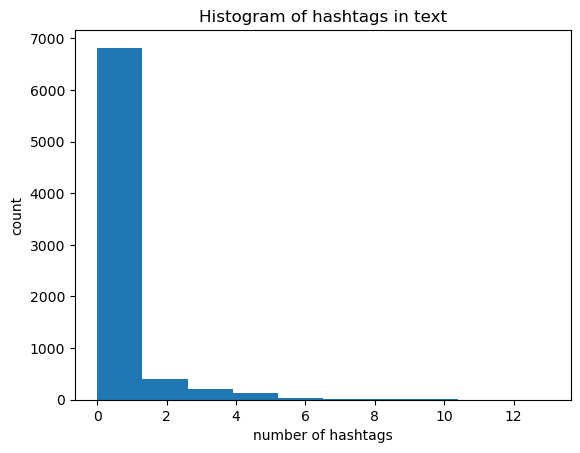

In [207]:
plt.title("Histogram of hashtags in text")
plt.xlabel("number of hashtags")
plt.ylabel("count")
plt.hist(df["hash_count"])
plt.show()

In [196]:
positive_hash = df.loc[df['target'] == 1]["hash_list"].to_list()
negative_hash = df.loc[df['target'] == 0]["hash_list"].to_list() 

In [197]:
def flatten(list):
    res = {}
    for y in list:
        for x in y:
            if (x in res):
                res[x] += 1
            else:
                res[x] = 1
    return res

In [198]:
hash_1 = flatten(positive_hash)
hash_0 = flatten(negative_hash)

In [199]:
sorted(hash_1.items(), key=lambda x:x[1], reverse=True)

[('news', 56),
 ('hiroshima', 22),
 ('earthquake', 19),
 ('hot', 13),
 ('prebreak', 13),
 ('best', 13),
 ('japan', 11),
 ('india', 10),
 ('yyc', 10),
 ('breaking', 9),
 ('worldnews', 9),
 ('world', 9),
 ('isis', 9),
 ('sismo', 9),
 ('abstorm', 9),
 ('islam', 9),
 ('disaster', 8),
 ('wildfire', 8),
 ('terrorism', 8),
 ('fukushima', 8),
 ('mh370', 7),
 ('bbc', 7),
 ('genocide', 7),
 ('wx', 7),
 ('okwx', 7),
 ('hailstorm', 7),
 ('nuclear', 7),
 ('rohingya', 6),
 ('cnn', 6),
 ('africa', 6),
 ('antioch', 6),
 ('bestnaijamade', 6),
 ('wildfires', 5),
 ('newyork', 5),
 ('mumbai', 5),
 ('wmata', 5),
 ('myanmar', 5),
 ('sittwe', 5),
 ('drought', 5),
 ('libya', 5),
 ('pakistan', 5),
 ('science', 5),
 ('socialnews', 5),
 ('rockyfire', 4),
 ('flood', 4),
 ('california', 4),
 ('manchester', 4),
 ('accident', 4),
 ('tcot', 4),
 ('irandeal', 4),
 ('usa', 4),
 ('weather', 4),
 ('us', 4),
 ('zionist', 4),
 ('terrorist', 4),
 ('phoenix', 4),
 ('strategicpatience', 4),
 ('usgs', 4),
 ('hostages', 4),
 ('

In [200]:
sorted(hash_0.items(), key=lambda x:x[1], reverse=True)

[('nowplaying', 21),
 ('news', 20),
 ('hot', 18),
 ('prebreak', 17),
 ('best', 17),
 ('gbbo', 14),
 ('jobs', 14),
 ('islam', 14),
 ('job', 12),
 ('hiring', 10),
 ('fashion', 9),
 ('edm', 8),
 ('dnb', 8),
 ('beyhive', 8),
 ('directioners', 8),
 ('emmerdale', 8),
 ('rt', 7),
 ('dubstep', 7),
 ('trapmusic', 7),
 ('dance', 7),
 ('ices', 7),
 ('handbag', 7),
 ('animalrescue', 7),
 ('mtvhottest', 6),
 ('kindle', 6),
 ('soundcloud', 6),
 ('military', 6),
 ('nursing', 6),
 ('armageddon', 5),
 ('bb17', 5),
 ('womens', 5),
 ('irandeal', 5),
 ('seattle', 5),
 ('technology', 5),
 ('art', 5),
 ('np', 5),
 ('summerfate', 5),
 ('tubestrike', 5),
 ('nsfw', 4),
 ('lgbt', 4),
 ('tbt', 4),
 ('bluejays', 4),
 ('chemical', 4),
 ('dependency', 4),
 ('business', 4),
 ('course', 4),
 ('free', 4),
 ('1', 4),
 ('prophetmuhammad', 4),
 ('quote', 4),
 ('afterlife', 4),
 ('7', 4),
 ('ramag', 4),
 ('models', 4),
 ('mayhem', 4),
 ('mets', 3),
 ('pbban', 3),
 ('love', 3),
 ('ultimalucha', 3),
 ('us', 3),
 ('insurance

In [202]:
hash_1

{'earthquake': 19,
 'wildfires': 5,
 'alaska': 1,
 'rockyfire': 4,
 'cafire': 2,
 'flood': 4,
 'disaster': 8,
 'flooding': 3,
 'raining': 1,
 'florida': 2,
 'tampabay': 1,
 'tampa': 1,
 'we': 1,
 'breaking': 9,
 'africanbaze': 1,
 'bridgetown': 1,
 'kurds': 1,
 'diyala': 1,
 'california': 4,
 'climate': 2,
 'energy': 1,
 'nashvilletraffic': 1,
 'santaclara': 1,
 'bayarea': 1,
 'traffic': 3,
 'truckcrash': 1,
 'fortworth': 1,
 'ashville': 1,
 'manchester': 4,
 'hagerstown': 1,
 'whag': 1,
 'bahrain': 1,
 'news': 56,
 'horrible': 1,
 'accident': 4,
 'watchthevideo': 1,
 'kca': 3,
 'votejkt48id': 3,
 'rip': 2,
 'binladen': 1,
 'mlb': 2,
 'man': 1,
 'airport': 1,
 'airplane': 3,
 'aircraft': 2,
 'aeroplane': 1,
 'runway': 1,
 'freaky': 1,
 'crash': 2,
 'pilot': 1,
 'death': 1,
 'carfest': 1,
 'omg': 1,
 'jetengine': 1,
 'turbojet': 1,
 'boing': 1,
 'g90': 1,
 'rodkiai': 1,
 'emsne': 1,
 'yugvani': 3,
 'til_now': 2,
 'dna': 1,
 'reuters': 3,
 'worldnews': 9,
 'gilbert23': 1,
 'internetradio

In [203]:
len(hash_1)

983

In [204]:
len(hash_0)

1142

In [205]:
df.head()

,text,target,text_len,text_words,hash_count,hash_list
0,our deeds are the reason of this #earthquake m...,1,69,13,1,[earthquake]
1,forest fire near la ronge sask. canada,1,38,7,0,[]
2,all residents asked to 'shelter in place' are ...,1,133,22,0,[]
3,"13,000 people receive #wildfires evacuation or...",1,65,8,1,[wildfires]
4,just got sent this photo from ruby #alaska as ...,1,88,16,2,"[alaska, wildfires]"


In [208]:
df['text'] = df['text'].apply(lambda x: x.replace('#', ''))

In [209]:
df.head()

,text,target,text_len,text_words,hash_count,hash_list
0,our deeds are the reason of this earthquake ma...,1,69,13,1,[earthquake]
1,forest fire near la ronge sask. canada,1,38,7,0,[]
2,all residents asked to 'shelter in place' are ...,1,133,22,0,[]
3,"13,000 people receive wildfires evacuation ord...",1,65,8,1,[wildfires]
4,just got sent this photo from ruby alaska as s...,1,88,16,2,"[alaska, wildfires]"


# Clean text

In [212]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [215]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mikolajjedrzejewski/nltk_data...


In [216]:
df['clean_text']=df['text'].map(lambda s:preprocess(s)) 

In [217]:
df.head()

,text,target,text_len,text_words,hash_count,hash_list,clean_text
0,our deeds are the reason of this earthquake ma...,1,69,13,1,[earthquake],deeds reason earthquake may allah forgive
1,forest fire near la ronge sask. canada,1,38,7,0,[],forest fire near ronge sask canada
2,all residents asked to 'shelter in place' are ...,1,133,22,0,[],residents asked shelter place notified officer...
3,"13,000 people receive wildfires evacuation ord...",1,65,8,1,[wildfires],people receive wildfires evacuation orders cal...
4,just got sent this photo from ruby alaska as s...,1,88,16,2,"[alaska, wildfires]",got sent photo ruby alaska smoke wildfires pou...


In [219]:
df['tokenized'] = df['clean_text'].apply(nltk.word_tokenize)
df.head()

,text,target,text_len,text_words,hash_count,hash_list,clean_text,tokenized
0,our deeds are the reason of this earthquake ma...,1,69,13,1,[earthquake],deeds reason earthquake may allah forgive,"[deeds, reason, earthquake, may, allah, forgive]"
1,forest fire near la ronge sask. canada,1,38,7,0,[],forest fire near ronge sask canada,"[forest, fire, near, ronge, sask, canada]"
2,all residents asked to 'shelter in place' are ...,1,133,22,0,[],residents asked shelter place notified officer...,"[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive wildfires evacuation ord...",1,65,8,1,[wildfires],people receive wildfires evacuation orders cal...,"[people, receive, wildfires, evacuation, order..."
4,just got sent this photo from ruby alaska as s...,1,88,16,2,"[alaska, wildfires]",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


# Stemming and Lemmatization

In [222]:
df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)
df.head()

,text,target,text_len,text_words,hash_count,hash_list,clean_text,tokenized,pos_tags
0,our deeds are the reason of this earthquake ma...,1,69,13,1,[earthquake],deeds reason earthquake may allah forgive,"[deeds, reason, earthquake, may, allah, forgive]","[(deeds, NNS), (reason, NN), (earthquake, NN),..."
1,forest fire near la ronge sask. canada,1,38,7,0,[],forest fire near ronge sask canada,"[forest, fire, near, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (ronge..."
2,all residents asked to 'shelter in place' are ...,1,133,22,0,[],residents asked shelter place notified officer...,"[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)..."
3,"13,000 people receive wildfires evacuation ord...",1,65,8,1,[wildfires],people receive wildfires evacuation orders cal...,"[people, receive, wildfires, evacuation, order...","[(people, NNS), (receive, VBP), (wildfires, NN..."
4,just got sent this photo from ruby alaska as s...,1,88,16,2,"[alaska, wildfires]",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N..."


In [228]:
# get the right format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [229]:
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

,text,target,text_len,text_words,hash_count,hash_list,clean_text,tokenized,pos_tags,wordnet_pos
0,our deeds are the reason of this earthquake ma...,1,69,13,1,[earthquake],deeds reason earthquake may allah forgive,"[deeds, reason, earthquake, may, allah, forgive]","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma..."
1,forest fire near la ronge sask. canada,1,38,7,0,[],forest fire near ronge sask canada,"[forest, fire, near, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (ronge...","[(forest, a), (fire, n), (near, n), (ronge, n)..."
2,all residents asked to 'shelter in place' are ...,1,133,22,0,[],residents asked shelter place notified officer...,"[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl..."
3,"13,000 people receive wildfires evacuation ord...",1,65,8,1,[wildfires],people receive wildfires evacuation orders cal...,"[people, receive, wildfires, evacuation, order...","[(people, NNS), (receive, VBP), (wildfires, NN...","[(people, n), (receive, v), (wildfires, n), (e..."
4,just got sent this photo from ruby alaska as s...,1,88,16,2,"[alaska, wildfires]",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (..."


In [230]:
wnl = WordNetLemmatizer()
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df.head()

,text,target,text_len,text_words,hash_count,hash_list,clean_text,tokenized,pos_tags,wordnet_pos,lemmatized
0,our deeds are the reason of this earthquake ma...,1,69,13,1,[earthquake],deeds reason earthquake may allah forgive,"[deeds, reason, earthquake, may, allah, forgive]","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma...","[deed, reason, earthquake, may, allah, forgive]"
1,forest fire near la ronge sask. canada,1,38,7,0,[],forest fire near ronge sask canada,"[forest, fire, near, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (ronge...","[(forest, a), (fire, n), (near, n), (ronge, n)...","[forest, fire, near, ronge, sask, canada]"
2,all residents asked to 'shelter in place' are ...,1,133,22,0,[],residents asked shelter place notified officer...,"[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl...","[resident, ask, shelter, place, notify, office..."
3,"13,000 people receive wildfires evacuation ord...",1,65,8,1,[wildfires],people receive wildfires evacuation orders cal...,"[people, receive, wildfires, evacuation, order...","[(people, NNS), (receive, VBP), (wildfires, NN...","[(people, n), (receive, v), (wildfires, n), (e...","[people, receive, wildfire, evacuation, order,..."
4,just got sent this photo from ruby alaska as s...,1,88,16,2,"[alaska, wildfires]",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (...","[get, sent, photo, ruby, alaska, smoke, wildfi..."


# EDA

In [234]:
df = df[['target', 'lemmatized']]

In [235]:
df.head()

,target,lemmatized
0,1,"[deed, reason, earthquake, may, allah, forgive]"
1,1,"[forest, fire, near, ronge, sask, canada]"
2,1,"[resident, ask, shelter, place, notify, office..."
3,1,"[people, receive, wildfire, evacuation, order,..."
4,1,"[get, sent, photo, ruby, alaska, smoke, wildfi..."


In [236]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()


/var/folders/1y/669trp_567g9g1gdn_p7zdcc0000gp/T/ipykernel_46580/4169403200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]


,target,lemmatized,lemma_str
0,1,"[deed, reason, earthquake, may, allah, forgive]",deed reason earthquake may allah forgive
1,1,"[forest, fire, near, ronge, sask, canada]",forest fire near ronge sask canada
2,1,"[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...
3,1,"[people, receive, wildfire, evacuation, order,...",people receive wildfire evacuation order calif...
4,1,"[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...


## Sentiment

In [237]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

/var/folders/1y/669trp_567g9g1gdn_p7zdcc0000gp/T/ipykernel_46580/1190833320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)


,target,lemmatized,lemma_str,sentiment
0,1,"[deed, reason, earthquake, may, allah, forgive]",deed reason earthquake may allah forgive,0.0
1,1,"[forest, fire, near, ronge, sask, canada]",forest fire near ronge sask canada,0.1
2,1,"[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...,0.0
3,1,"[people, receive, wildfire, evacuation, order,...",people receive wildfire evacuation order calif...,0.0
4,1,"[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...,0.0


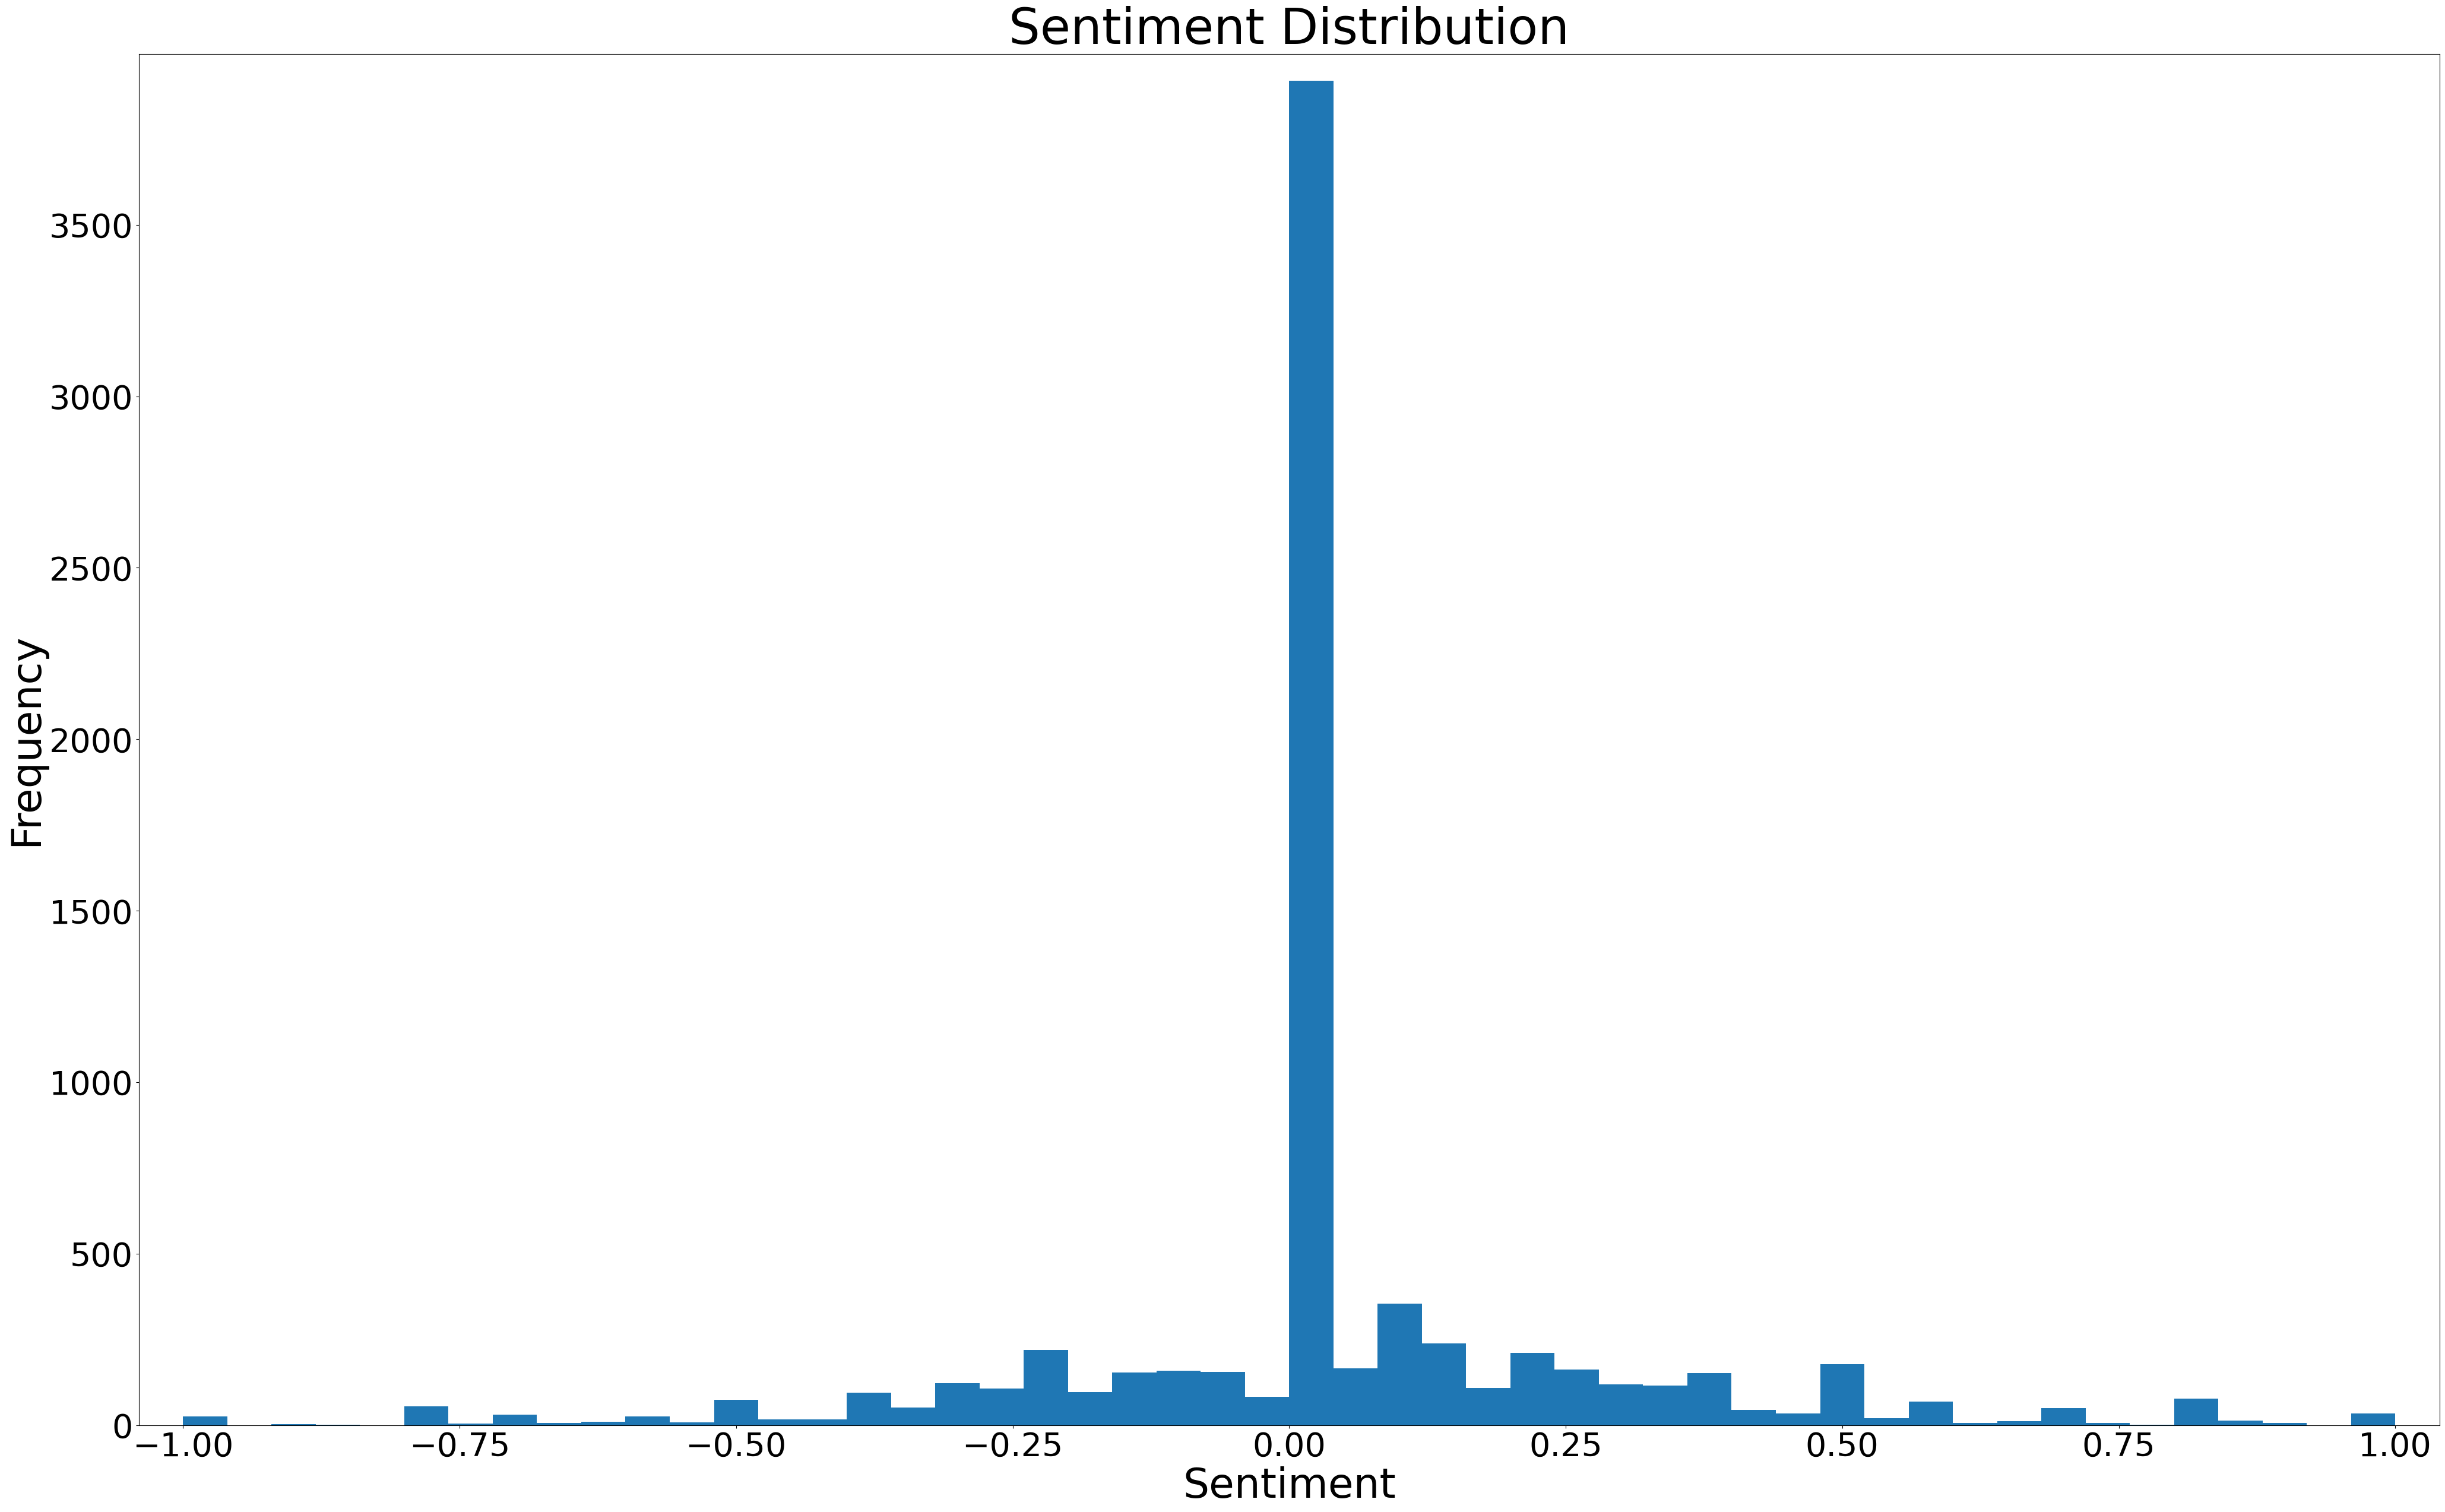

In [238]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [241]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['lemma_str'].astype(str).apply(len)

/var/folders/1y/669trp_567g9g1gdn_p7zdcc0000gp/T/ipykernel_46580/1354236264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
/var/folders/1y/669trp_567g9g1gdn_p7zdcc0000gp/T/ipykernel_46580/1354236264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_len'] = df['lemma_str'].astype(str).apply(len)


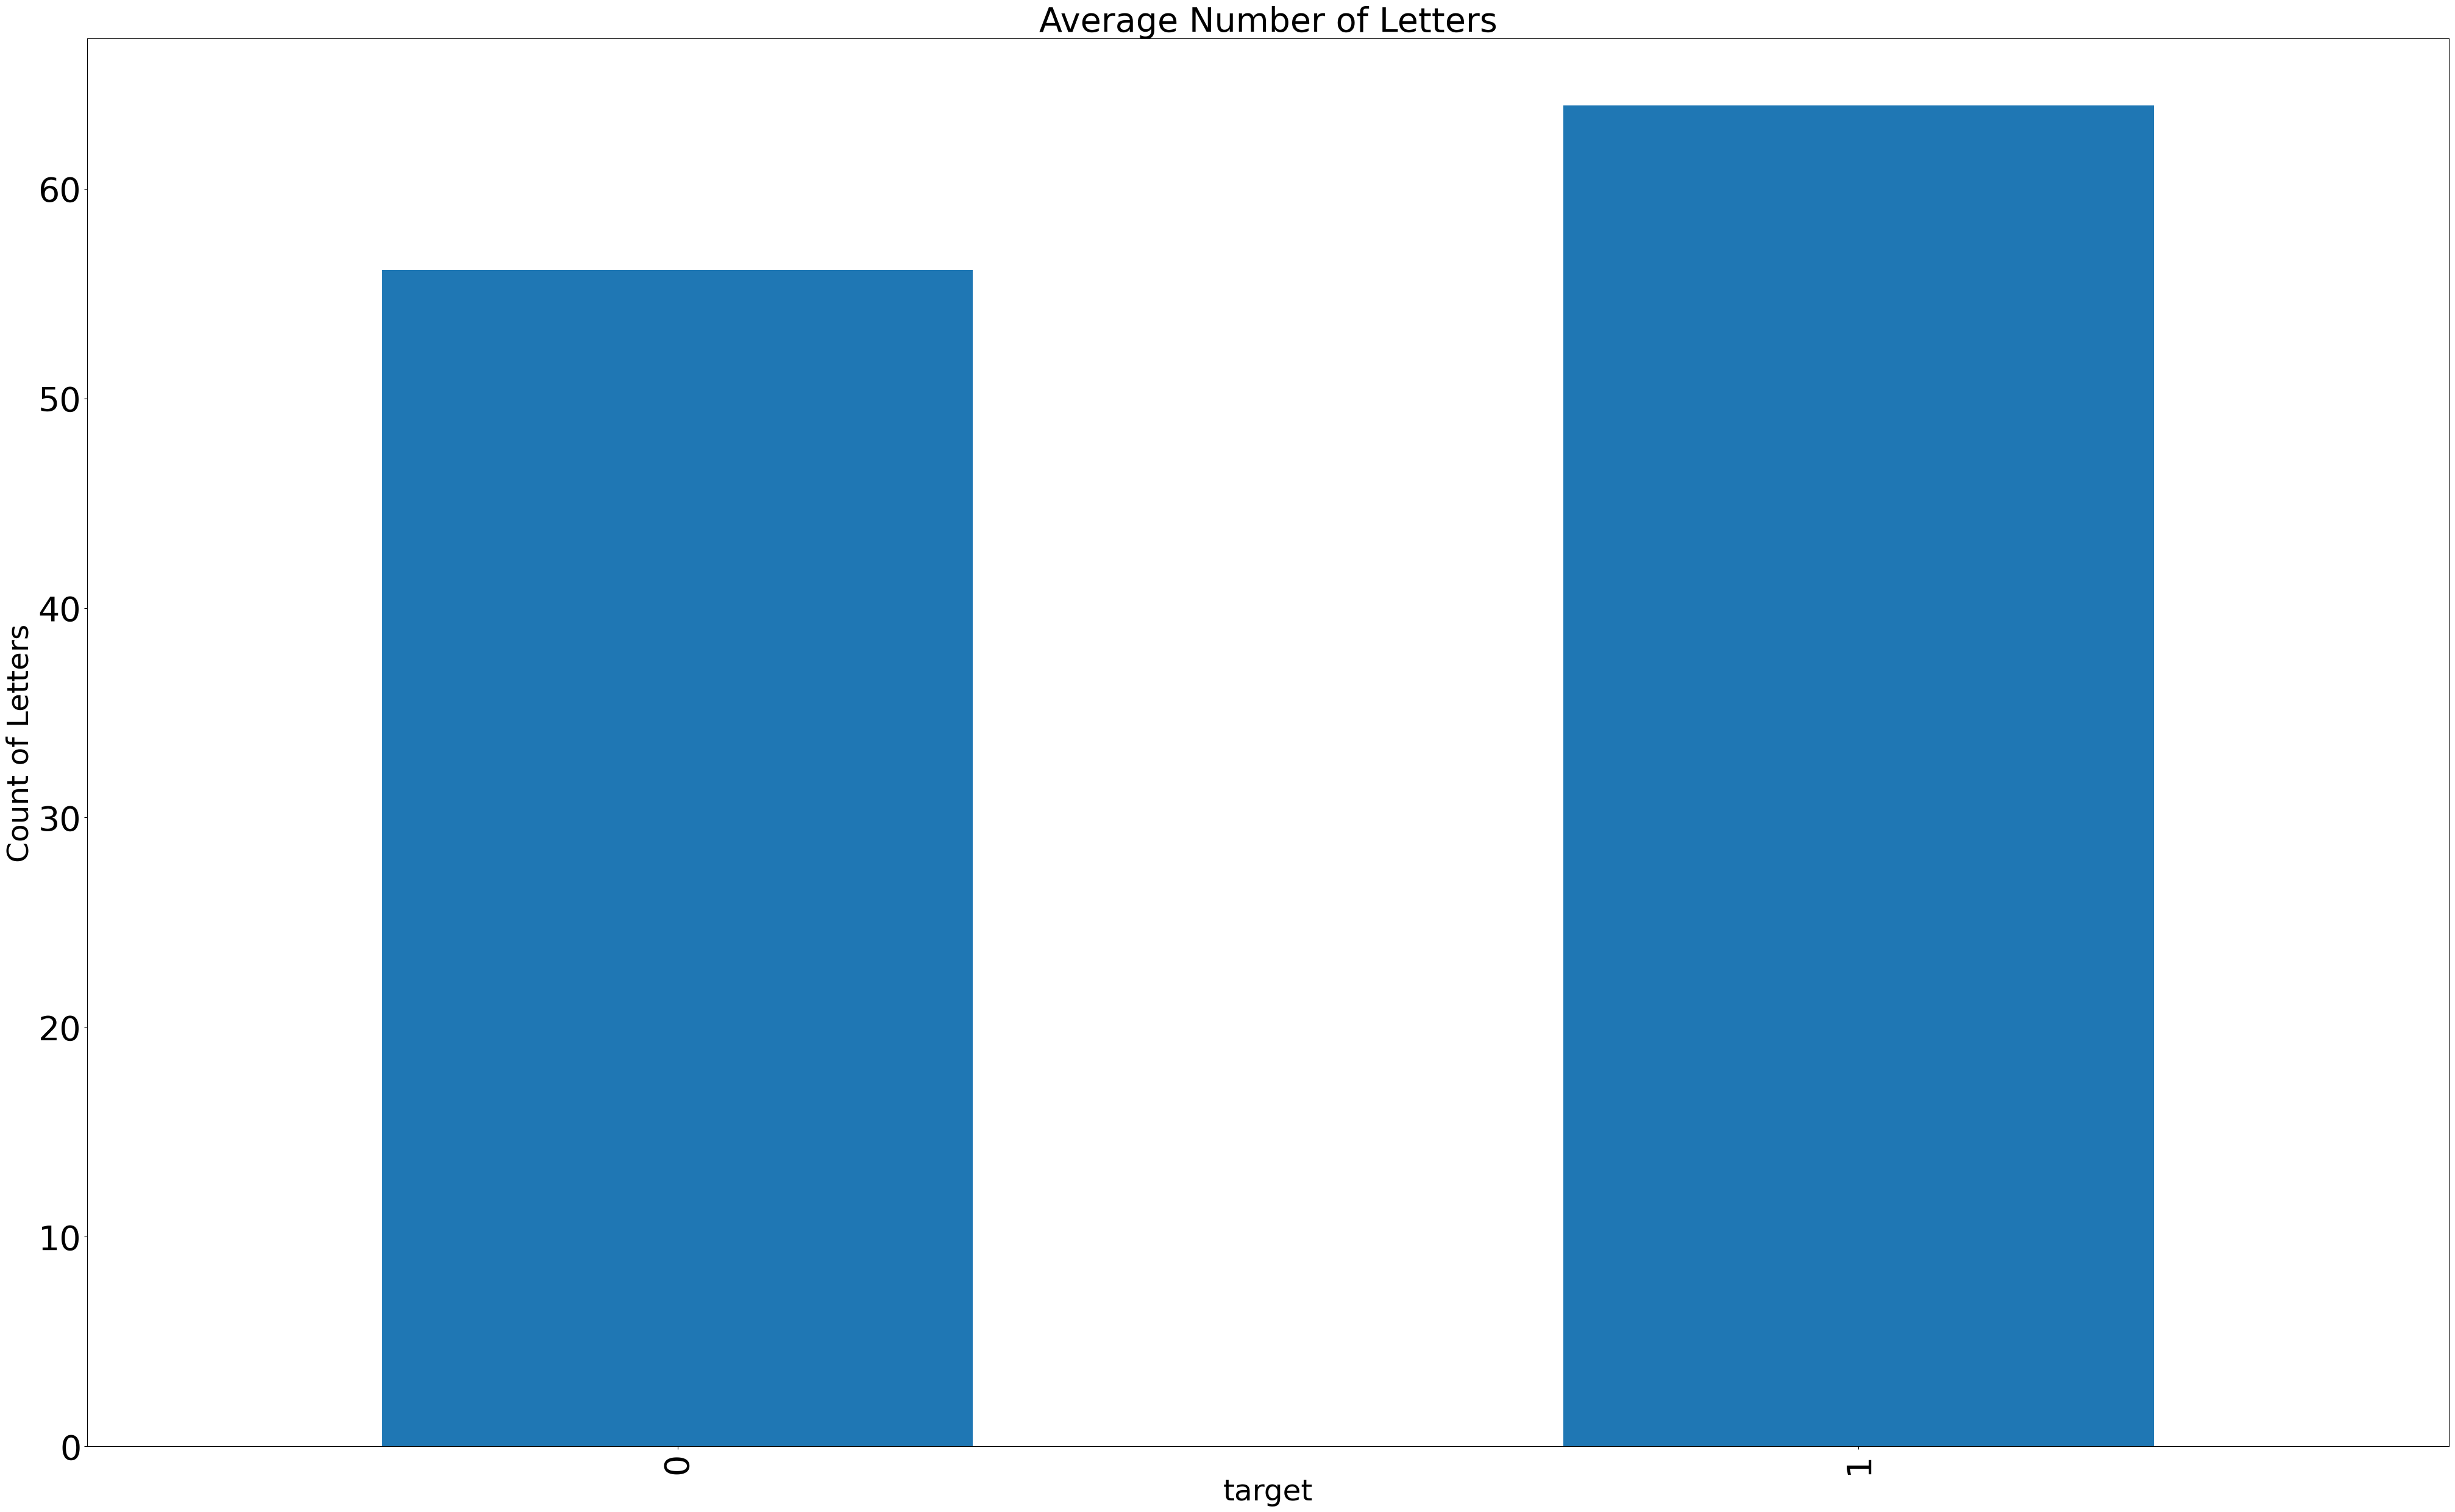

In [242]:
letter_avg = df.groupby('target')['review_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('target', fontsize=35)
plt.ylabel('Count of Letters', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters', fontsize=40)
plt.show()

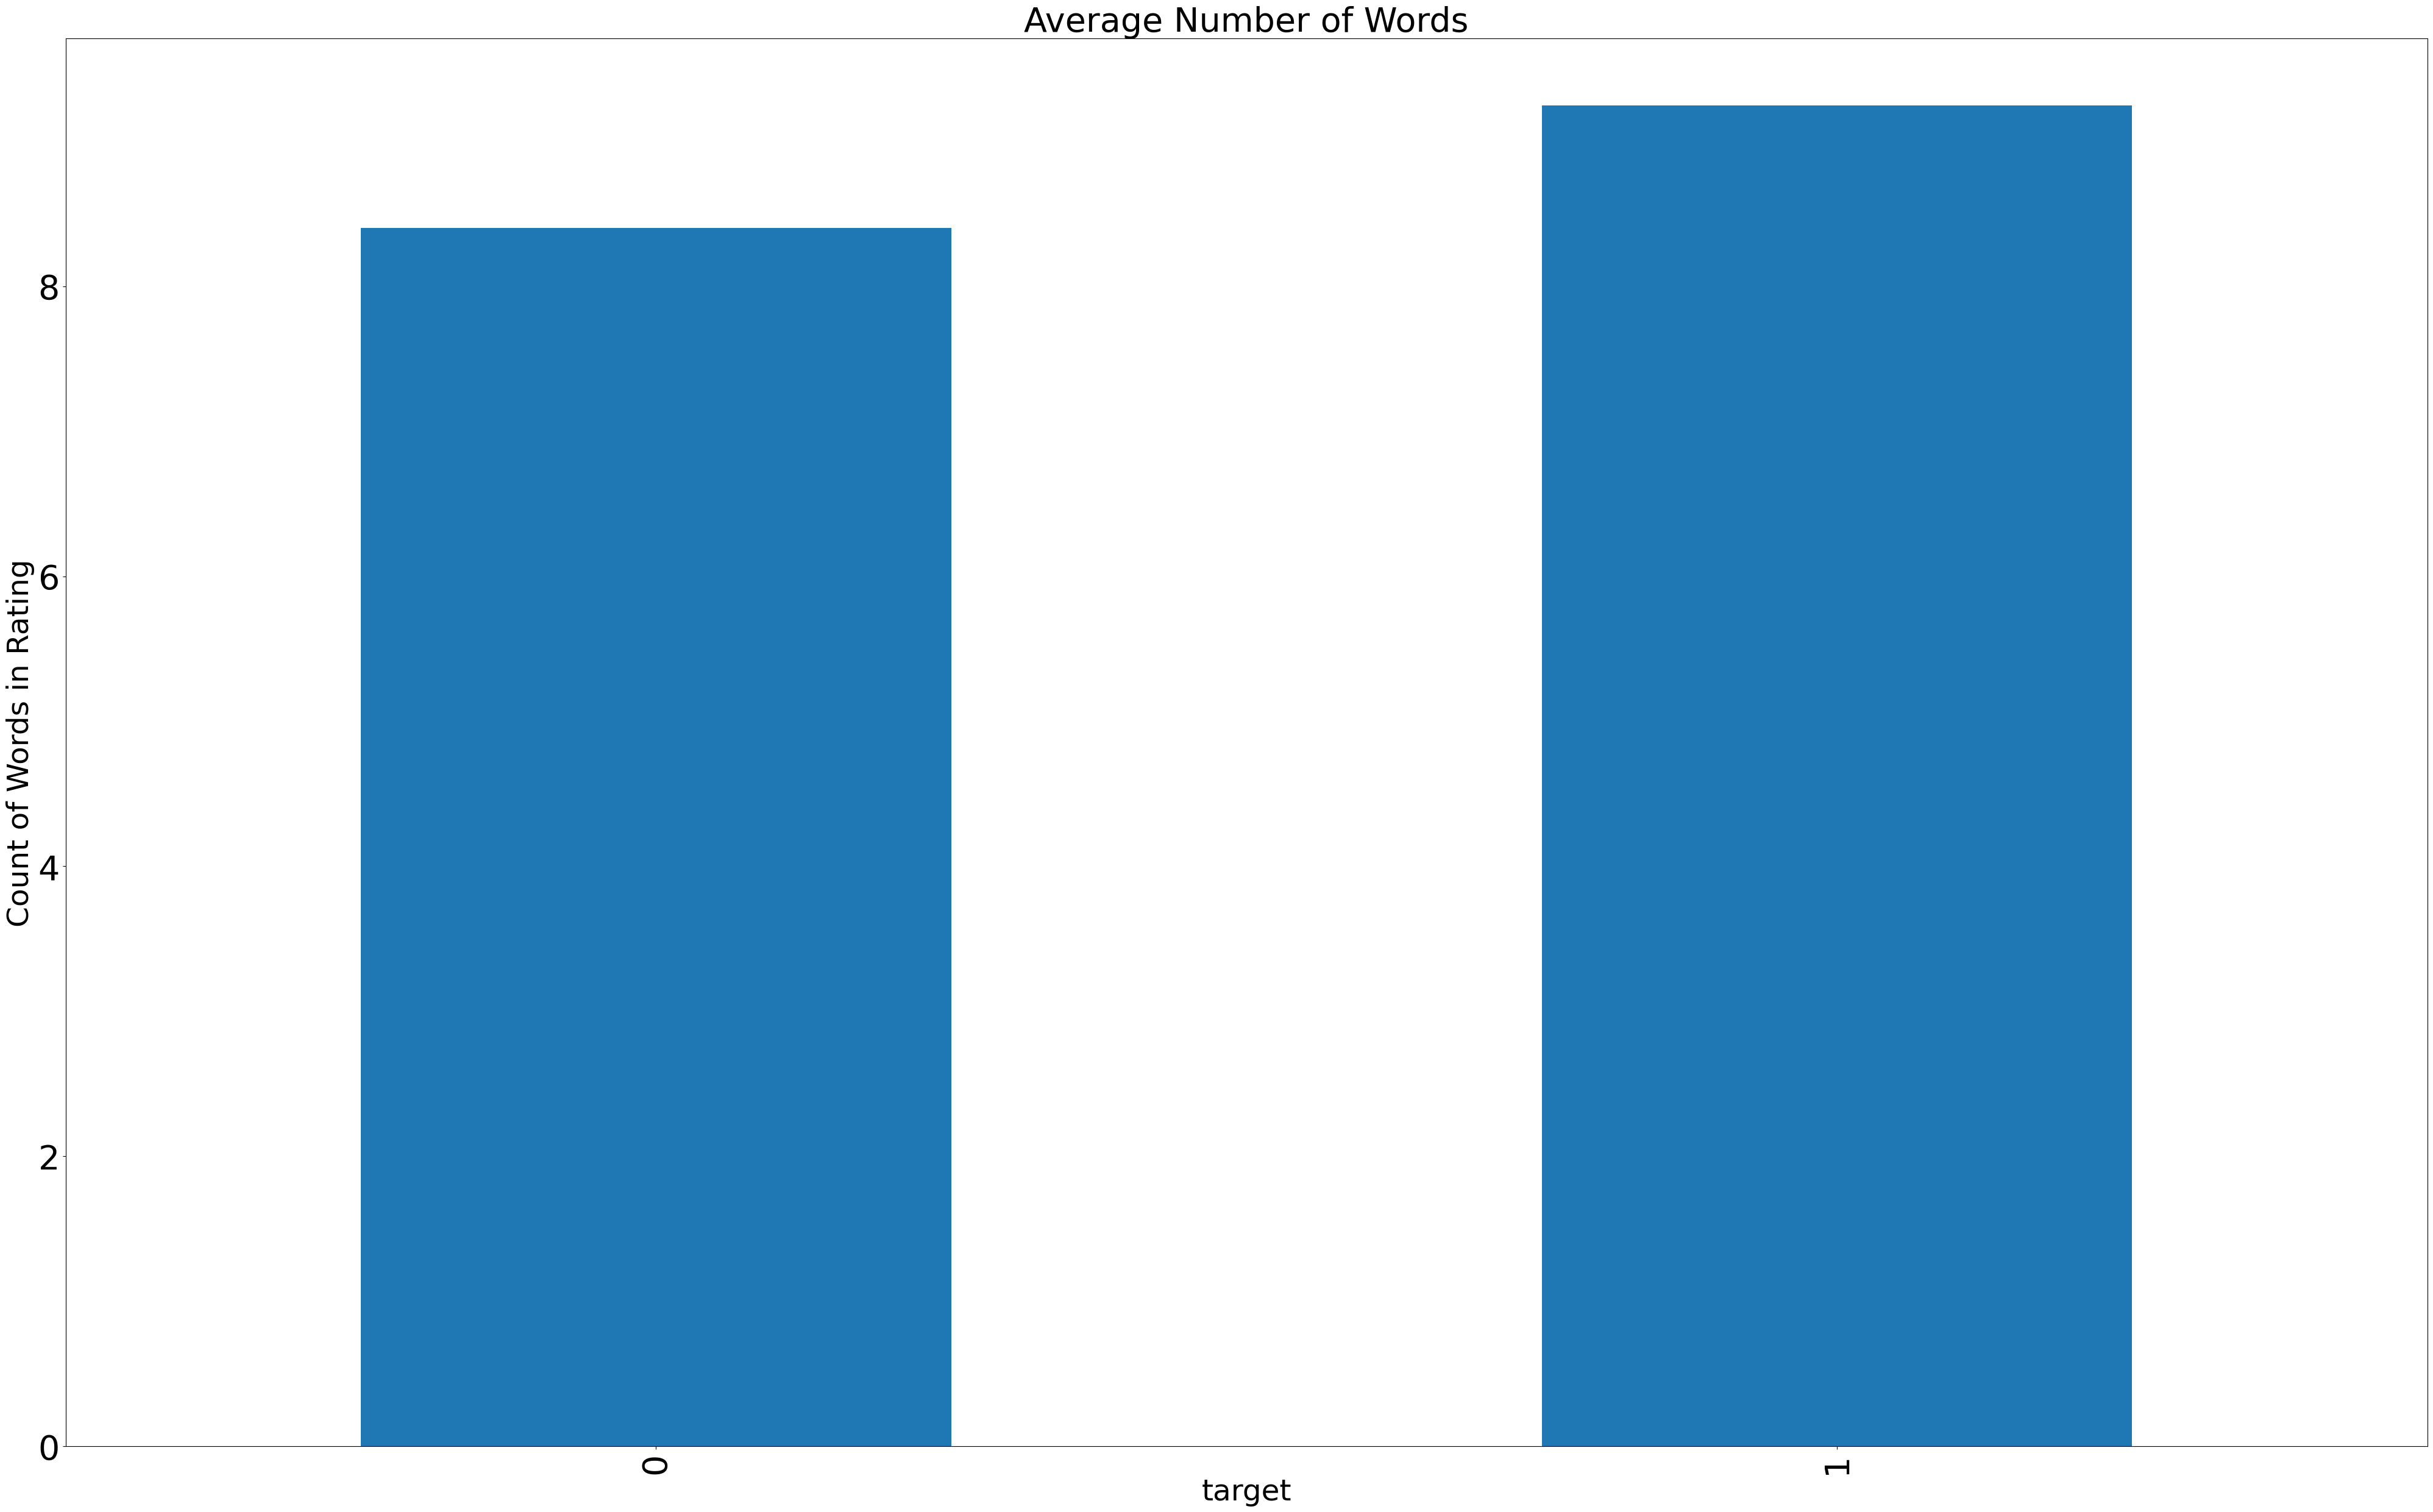

In [243]:
word_avg = df.groupby('target')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('target', fontsize=35)
plt.ylabel('Count of Words in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words', fontsize=40)
plt.show()

/var/folders/1y/669trp_567g9g1gdn_p7zdcc0000gp/T/ipykernel_46580/1961472732.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<AxesSubplot: >

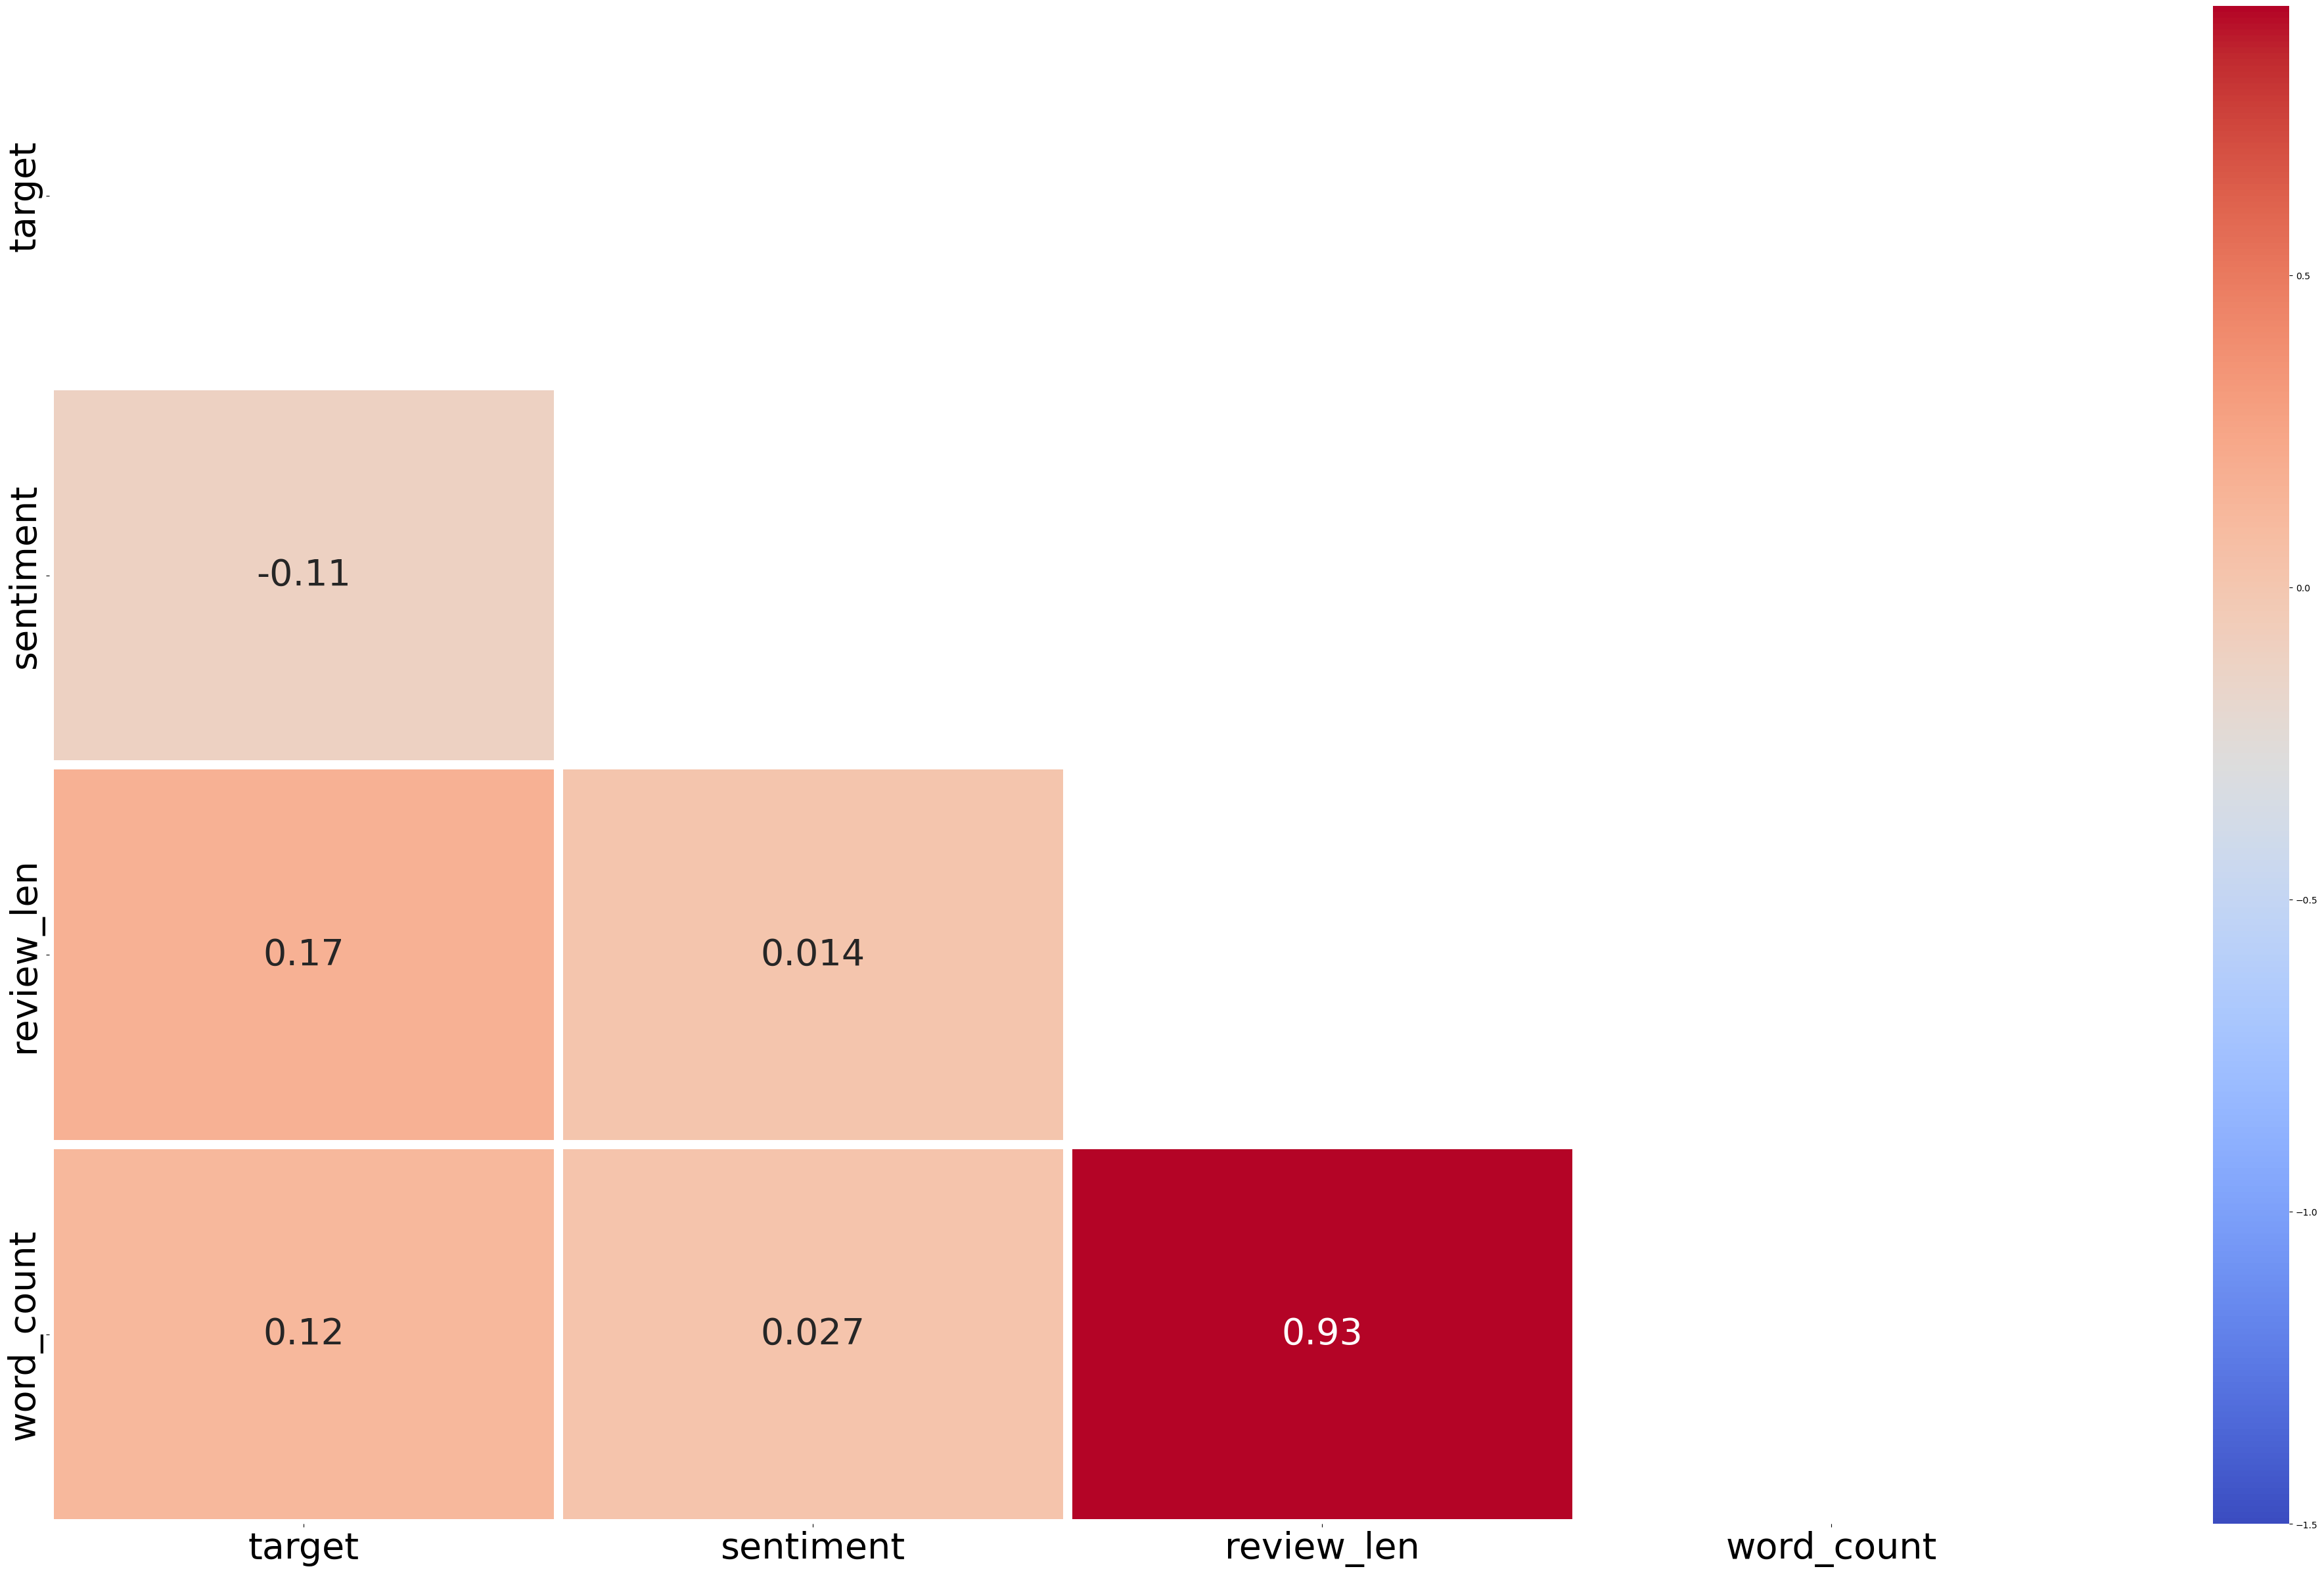

In [244]:
correlation = df[['target','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

# Term Frequency

In [246]:
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist

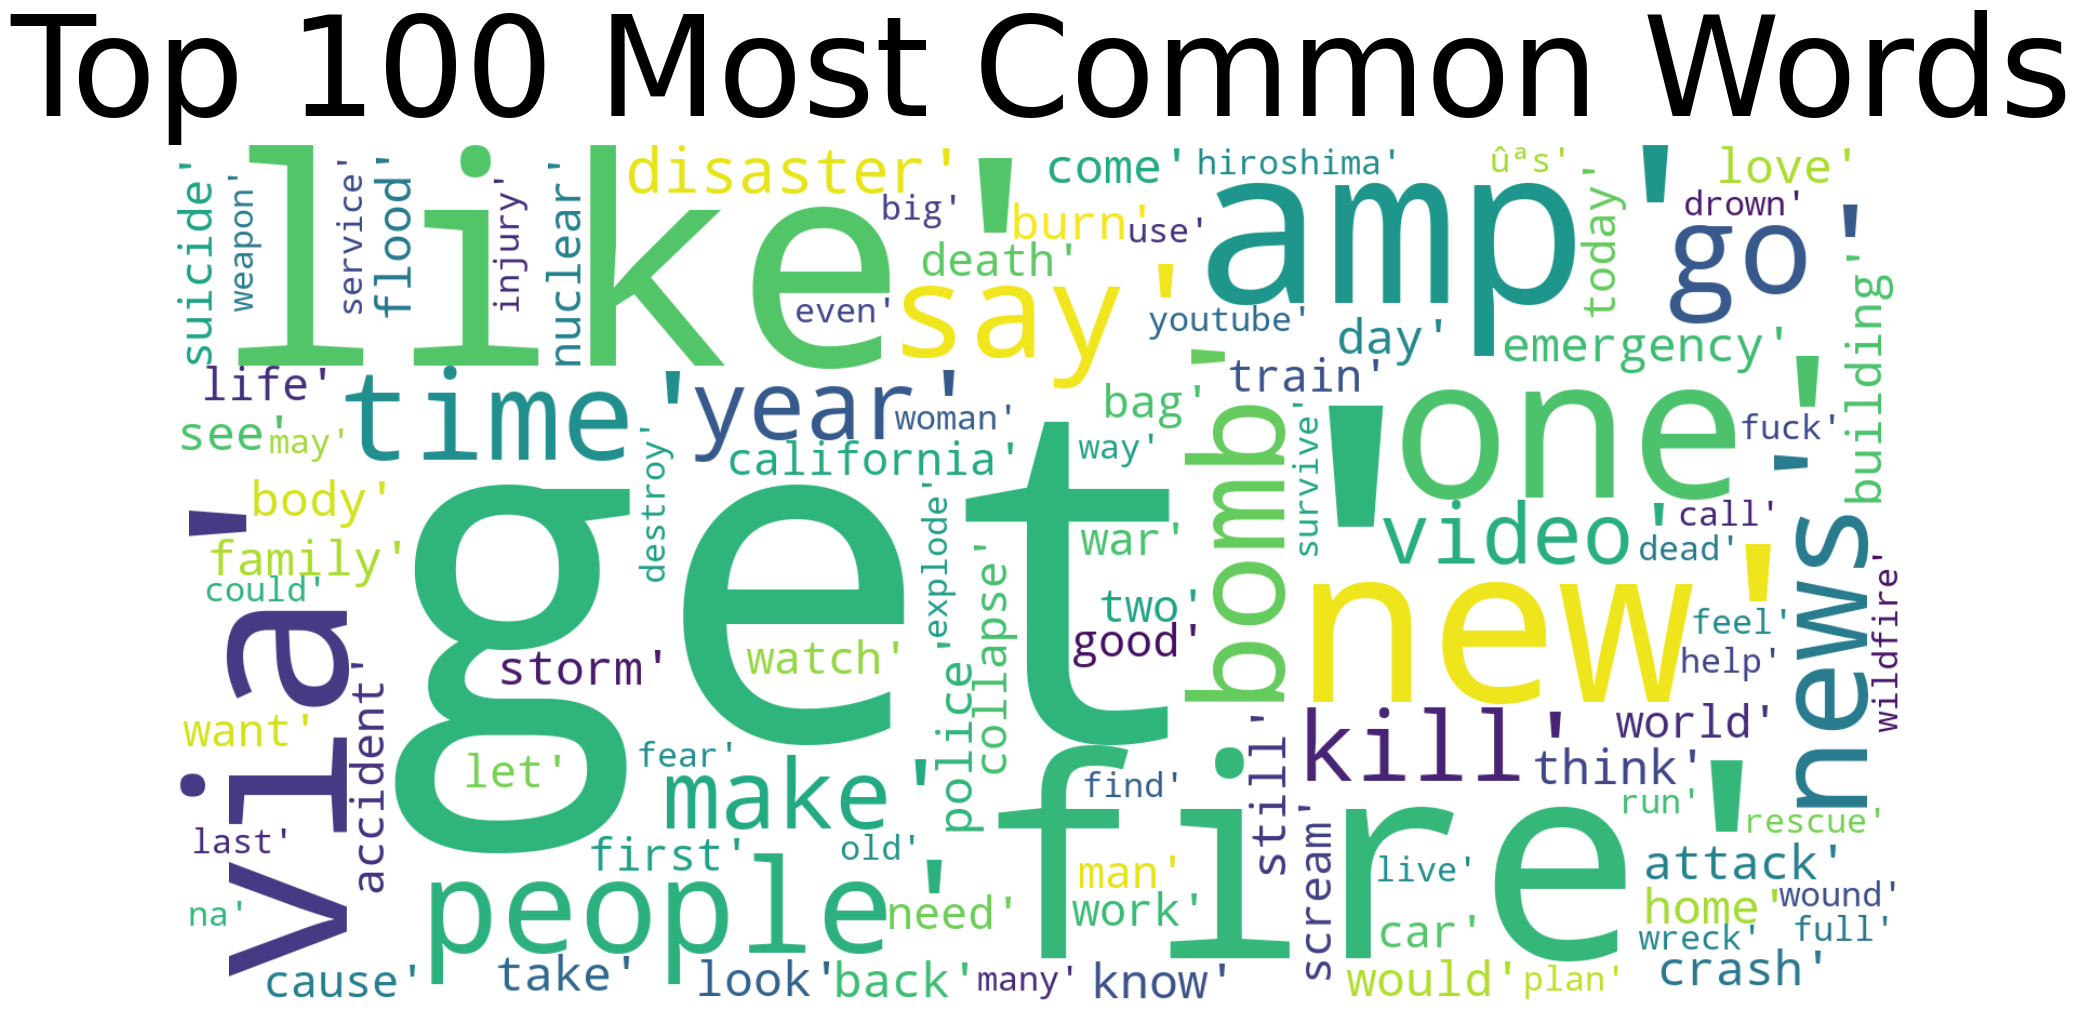

In [247]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

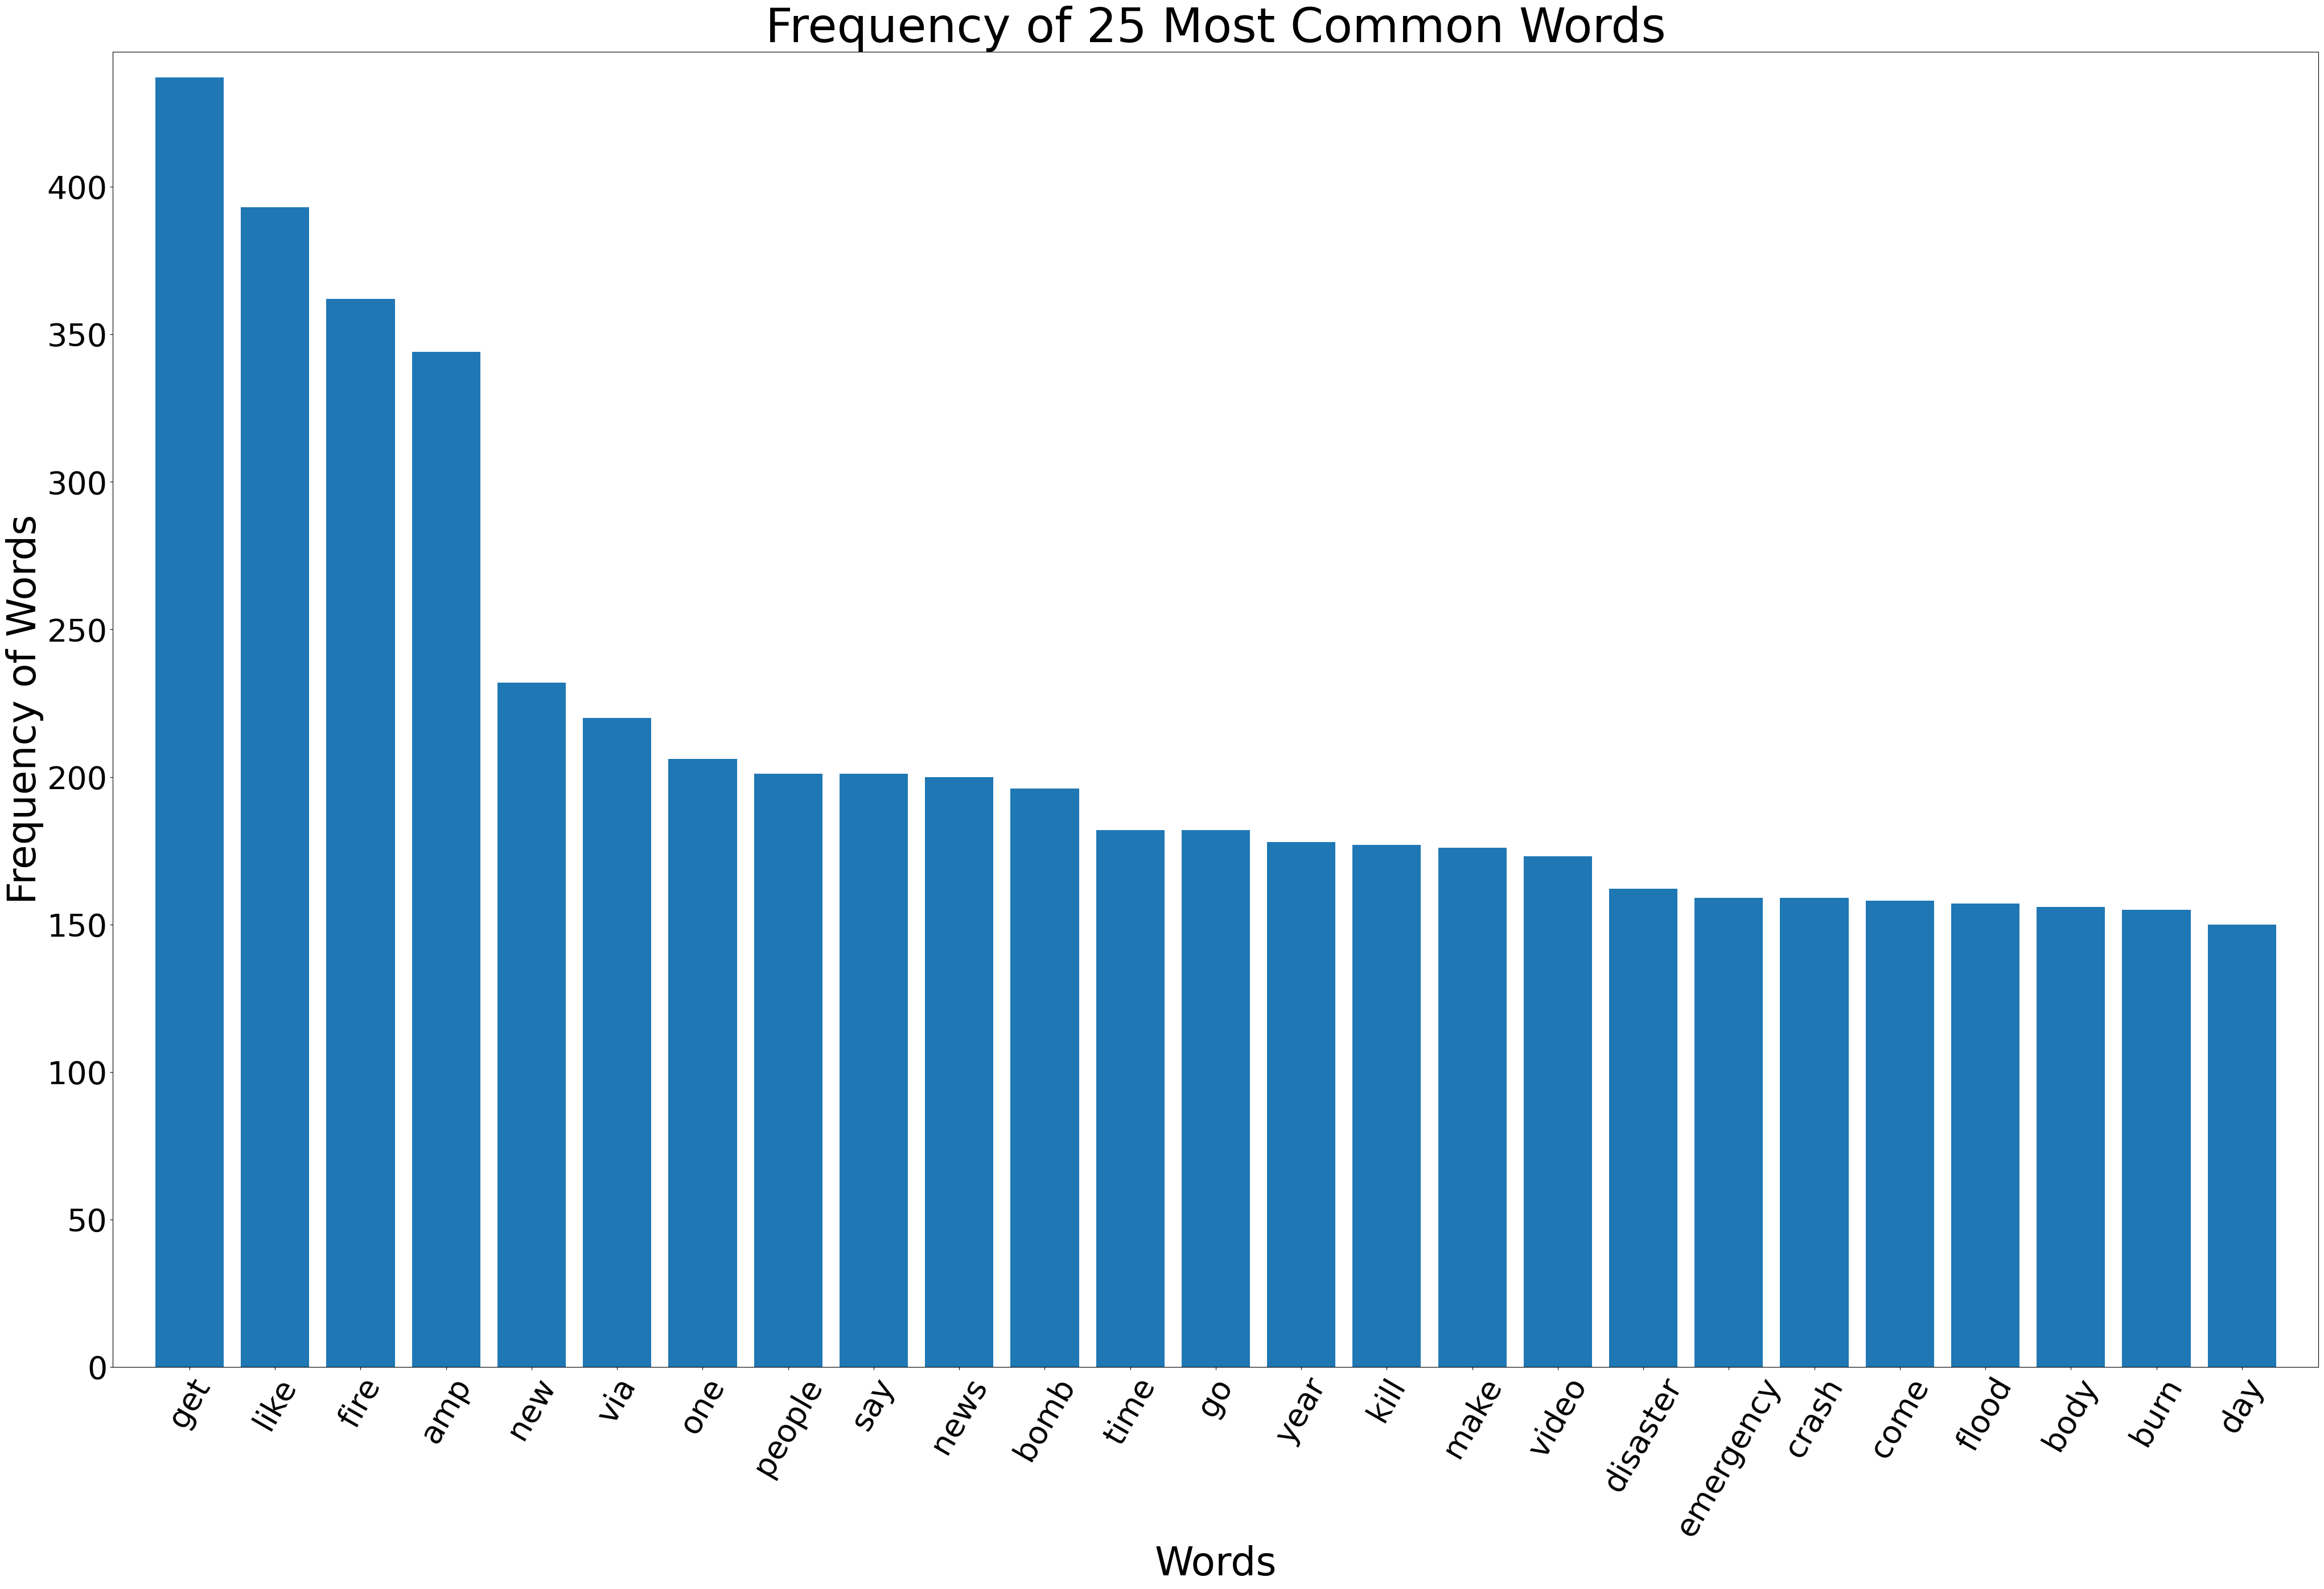

In [248]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

# Topic Modeling

In [250]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

/Users/mikolajjedrzejewski/opt/miniconda3/envs/hackathonKNDS/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abc,ablaze,accident,action,actually,add,affect,ago,air,airplane,...,wreck,wreckage,yeah,year,yes,yet,youtube,zone,ûªs,ûªt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
no_top_words = 10

# LDA

In [252]:
# LDA
lda_model = LatentDirichletAllocation(n_components=2, learning_method='online', max_iter=64, random_state=0).fit(tf)
no_top_words = 10
              
display_topics(lda_model, tf_feature_names, no_top_words)

KeyboardInterrupt: 

# TF-IDF

In [256]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(df['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

/Users/mikolajjedrzejewski/opt/miniconda3/envs/hackathonKNDS/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abc,ablaze,accident,action,actually,add,affect,ago,air,airplane,...,wreck,wreckage,yeah,year,yes,yet,youtube,zone,ûªs,ûªt
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
nmf = NMF(n_components=10, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, no_top_words)

/Users/mikolajjedrzejewski/opt/miniconda3/envs/hackathonKNDS/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


Topic 0:
amp love take please still back come life deluge crush
Topic 1:
fire forest building burn california truck wild evacuate bush wildfire
Topic 2:
get watch minute sandstorm go airport swallow lol one think
Topic 3:
like video youtube look feel fatality burn mudslide back one
Topic 4:
body bag cross shoulder woman lady full really read rescuer
Topic 5:
scream love fuck face day phone make hear follow loud
Topic 6:
bomb suicide bomber detonate old year hiroshima pkk army turkey
Topic 7:
crash via kill news attack flood police train say family
Topic 8:
disaster nuclear obama natural typhoon devastate declare saipan sign reactor
Topic 9:
new emergency plan service storm time reddit full day quarantine


In [262]:
nmf_topic_values = nmf.transform(tfidf)
df['nmf_topics'] = nmf_topic_values.argmax(axis=1)

nmf_remap = {0: 'Deluge', 1: 'Fire', 2: 'Sandstorm', 
            3: 'Mudslide', 4: 'Rescue', 5: 'Emotion', 
            6: 'Bomb', 7: 'Crash', 8: 'Typhoon', 9: 'Quarantine'}

df['nmf_topics'] = df['nmf_topics'].map(nmf_remap)

/Users/mikolajjedrzejewski/opt/miniconda3/envs/hackathonKNDS/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/var/folders/1y/669trp_567g9g1gdn_p7zdcc0000gp/T/ipykernel_46580/659824805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nmf_topics'] = nmf_topic_values.argmax(axis=1)
/var/folders/1y/669trp_567g9g1gdn_p7zdcc0000gp/T/ipykernel_46580/659824805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [264]:
df.head()

,target,lemmatized,lemma_str,sentiment,word_count,review_len,nmf_topics
0,1,"[deed, reason, earthquake, may, allah, forgive]",deed reason earthquake may allah forgive,0.0,6,40,Quarantine
1,1,"[forest, fire, near, ronge, sask, canada]",forest fire near ronge sask canada,0.1,6,34,Fire
2,1,"[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...,0.0,11,79,Crash
3,1,"[people, receive, wildfire, evacuation, order,...",people receive wildfire evacuation order calif...,0.0,6,51,Crash
4,1,"[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...,0.0,9,54,Sandstorm


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500')])

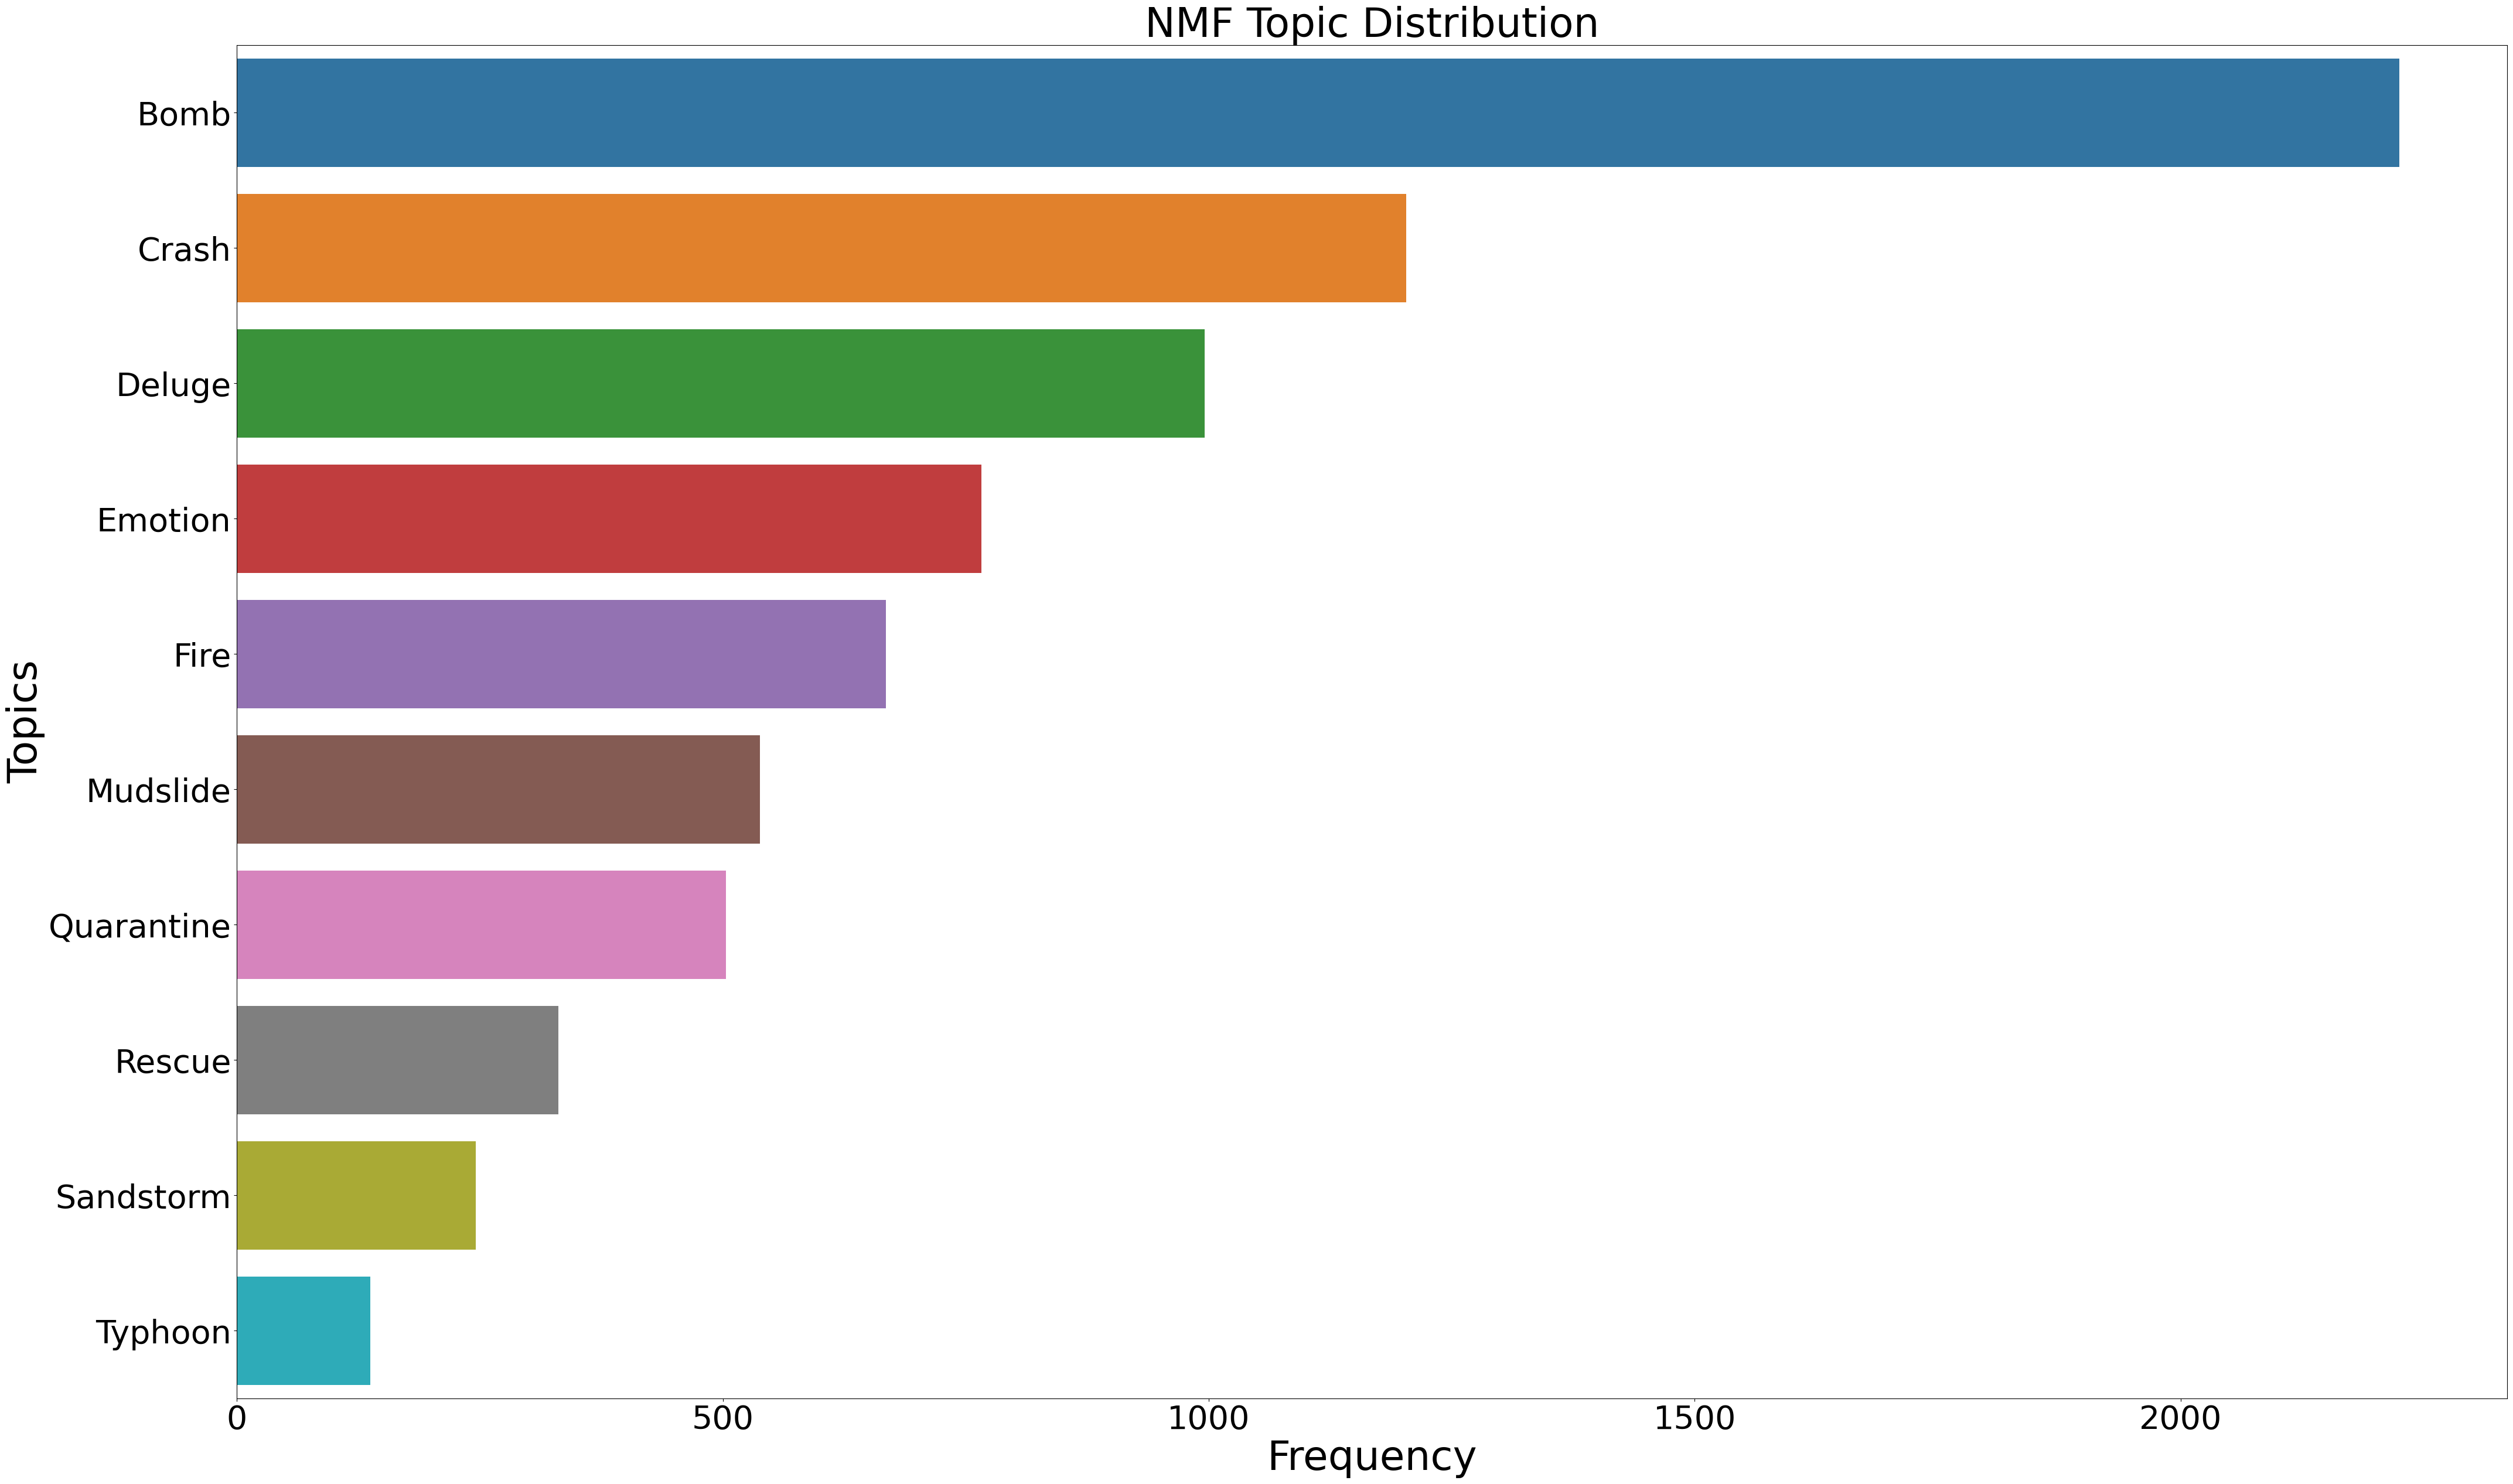

In [267]:
nmf_x = df['nmf_topics'].value_counts()
nmf_y = nmf_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x=nmf_x, y=nmf_y.index)
plt.title("NMF Topic Distribution", fontsize=50)
plt.ylabel('Topics', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=50)
plt.xticks(fontsize=40)

# Predict

In [270]:
df

,target,lemmatized,lemma_str,sentiment,word_count,review_len,nmf_topics
0,1,"[deed, reason, earthquake, may, allah, forgive]",deed reason earthquake may allah forgive,0.000000,6,40,Quarantine
1,1,"[forest, fire, near, ronge, sask, canada]",forest fire near ronge sask canada,0.100000,6,34,Fire
2,1,"[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...,0.000000,11,79,Crash
3,1,"[people, receive, wildfire, evacuation, order,...",people receive wildfire evacuation order calif...,0.000000,6,51,Crash
4,1,"[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...,0.000000,9,54,Sandstorm
...,...,...,...,...,...,...,...
7608,1,"[two, giant, crane, hold, bridge, collapse, ne...",two giant crane hold bridge collapse nearby home,0.000000,8,48,Crash
7609,1,"[aria_ahrary, thetawniest, control, wild, fire...",aria_ahrary thetawniest control wild fire cali...,0.100000,11,87,Fire
7610,1,"[utc, volcano, hawaii]",utc volcano hawaii,0.000000,3,18,Deluge
7611,1,"[police, investigate, bike, collide, car, litt...",police investigate bike collide car little por...,-0.260417,15,102,Crash


In [269]:
doc_term_matrix_tfidf

,abc,ablaze,accident,action,actually,add,affect,ago,air,airplane,...,wreck,wreckage,yeah,year,yes,yet,youtube,zone,ûªs,ûªt
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
X = doc_term_matrix_tfidf

In [280]:
Y = df['target']

In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state=0)

In [283]:
X_train.shape, Y_train.shape, X_test.shape


((6090, 566), (6090,), (1523, 566))

In [282]:
from sklearn.metrics import mean_absolute_error, accuracy_score, recall_score, precision_score, classification_report, balanced_accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [284]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

max_depth = range(1, 16)
max_feature = [16, 'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                verbose=False, 
                                cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, Y)

/Users/mikolajjedrzejewski/opt/miniconda3/envs/hackathonKNDS/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/mikolajjedrzejewski/opt/miniconda3/envs/hackathonKNDS/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/mikolajjedrzejewski/opt/miniconda3/envs/hackathonKNDS/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/mikolajjedrzejewski/opt/miniconda3/envs/hackathonKNDS/lib/python3.8/site-packages/sklearn/tree/_classes.py:298:

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 16),
                         'max_features': [16, 'auto']},
             verbose=False)

In [285]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}
0.6538879679513745
DecisionTreeClassifier(max_depth=15, max_features='auto')


In [286]:
dectree_grid = grid.best_estimator_
acc_decision_tree = round(dectree_grid.score(X, Y) * 100, 2)
acc_decision_tree

67.33